In [ ]:

import numpy as np 

%matplotlib inline 

import matplotlib.pyplot as plt 
import os 
from keras import layers 
from keras.models import Model
from keras.models import load_model
from keras import callbacks 
import cv2 
import string

In [ ]:

os.listdir("samples")

['226md.png',
 '22d5n.png',
 '2356g.png',
 '23mdg.png',
 '23n88.png',
 '243mm.png',
 '244e2.png',
 '245y5.png',
 '24f6w.png',
 '24pew.png',
 '25257.png',
 '253dc.png',
 '25egp.png',
 '25m6p.png',
 '25p2m.png',
 '25w53.png',
 '264m5.png',
 '268g2.png',
 '28348.png',
 '28x47.png',
 '2b827.png',
 '2bg48.png',
 '2cegf.png',
 '2cg58.png',
 '2cgyx.png',
 '2en7g.png',
 '2enf4.png',
 '2fxgd.png',
 '2g783.png',
 '2g7nm.png',
 '2gyb6.png',
 '2mg87.png',
 '2mpnn.png',
 '2n73f.png',
 '2nbc5.jpg',
 '2nbcx.png',
 '2nf26.png',
 '2npg6.png',
 '2nx38.png',
 '2p2y8.png',
 '2pfpn.png',
 '2w4y7.png',
 '2wc38.png',
 '2wx73.png',
 '2x7bm.png',
 '2xc2n.png',
 '2ycn8.png',
 '2yggg.png',
 '325fb.png',
 '32cnn.png',
 '32dnn.png',
 '33b22.png',
 '33f7m.png',
 '33n73.png',
 '33ng4.png',
 '33p4e.png',
 '34b84.png',
 '34fxm.png',
 '34pcn.png',
 '368y5.png',
 '36bc2.png',
 '36nx4.png',
 '36w25.png',
 '373gb.png',
 '377xx.png',
 '378e5.png',
 '37d52.png',
 '37ep6.png',
 '387g2.png',
 '38n57.png',
 '3b4we.png',
 '3bd8

In [ ]:

n=len(os.listdir("samples"))
n

1070

In [ ]:

imgshape=(50,200,1) 

In [ ]:
character= string.ascii_lowercase + "0123456789"
nchar = len(character) 
nchar

36

In [ ]:

def preprocess():
  X = np.zeros((n,50,200,1)) 
  y = np.zeros((5,n,nchar)) 
  for i, pic in enumerate(os.listdir("samples")):
  
    img = cv2.imread(os.path.join("samples", pic), cv2.IMREAD_GRAYSCALE) 
    pic_target = pic[:-4]
    
    if len(pic_target) < 6: 
      img = img / 255.0 
      img = np.reshape(img, (50, 200, 1)) 
      target=np.zeros((5,nchar)) 

      for j, k in enumerate(pic_target):
      
         index = character.find(k) 
         target[j, index] = 1 

      X[i] = img 
      y[:,i] = target 

  return X,y

In [ ]:

def createmodel():
    img = layers.Input(shape=imgshape) 
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) 
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) 
    mp3 = layers.MaxPooling2D(padding='same')(bn) 
    
    flat = layers.Flatten()(mp3) 

    outs = []
    for _ in range(5): 
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) 
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) 
    
    
    model = Model(img, outs) 
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [ ]:

model=createmodel();
model.summary();

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50, 200,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 50, 200,   │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 25, 100,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 25, 100,   │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 13, 50,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 13, 50,    │      9,248 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 50,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 7, 25, 32) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 5600)      │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    358,464 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │    358,464 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │    358,464 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │    358,464 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │    358,464 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 36)        │      2,340 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 36)        │      2,340 │ dropout_1[0][0] 

 Total params: 1,818,196 (6.94 MB)

 Trainable params: 1,818,132 (6.94 MB)

 Non-trainable params: 64 (256.00 B)

In [9]:
X,y=preprocess()

In [ ]:

X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [ ]:

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=[['accuracy']]*5 
)


In [ ]:

y_train_split = [y_train[i] for i in range(5)]
y_test_split = [y_test[i] for i in range(5)]


hist = model.fit(
    X_train,
    y_train_split,
    batch_size=32,
    epochs=60,
    validation_split=0.2
)


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - dense_1_accuracy: 0.0532 - dense_1_loss: 3.6622 - dense_3_accuracy: 0.0688 - dense_3_loss: 3.7517 - dense_5_accuracy: 0.0335 - dense_5_loss: 3.7037 - dense_7_accuracy: 0.0505 - dense_7_loss: 3.7796 - dense_9_accuracy: 0.0659 - dense_9_loss: 3.6726 - loss: 18.5717 - val_dense_1_accuracy: 0.0000e+00 - val_dense_1_loss: 3.5680 - val_dense_3_accuracy: 0.0515 - val_dense_3_loss: 3.5226 - val_dense_5_accuracy: 0.0567 - val_dense_5_loss: 3.5482 - val_dense_7_accuracy: 0.0567 - val_dense_7_loss: 3.5291 - val_dense_9_accuracy: 0.0619 - val_dense_9_loss: 3.5446 - val_loss: 17.7111
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - dense_1_accuracy: 0.0982 - dense_1_loss: 3.2192 - dense_3_accuracy: 0.1030 - dense_3_loss: 3.2715 - dense_5_accuracy: 0.0738 - dense_5_loss: 3.3458 - dense_7_accuracy: 0.0546 - dense_7_loss: 3.3964 - dense_9_accuracy: 0.0665 - dense_9_loss: 3.3752 - loss: 16.6103 - val_dense_1_accuracy: 0.0000e+00 - val_dense_1_

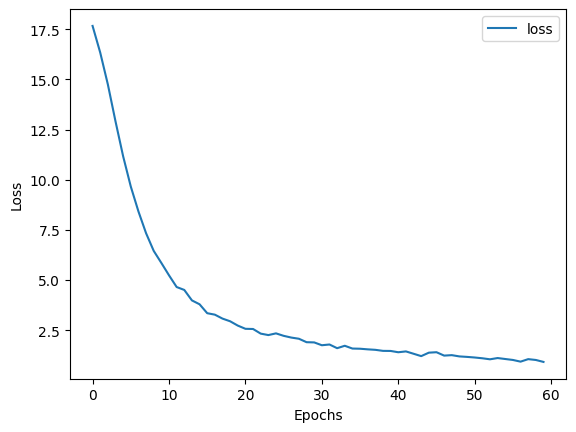

In [ ]:

for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [14]:
model.save("capcha.h5")
